### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 3


### Дисциплина: Методы машинного обучения

##### Студент: Турсунов Баходурхон Азимджонович
##### Группа: НФИбд-01-19

## Москва 2022
***

### Вариант №  26

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd


# 1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимый признак и зависимый признак (отклик).



In [2]:
ds = tfds.load("wine_quality", split='train')
data1 = tfds.as_dataframe(ds)
data = data1[['features/total sulfur dioxide', 'features/chlorides']].dropna()

# 2. Решите задачу полиномиальной регрессии для степени полинома, указанной в индивидуальном задании, при помощи нейронной сети с одним нейроном и оцените качество полученной модели по показателю, указанному в индивидуальном задании.   


In [3]:
import numpy as np
_x = data['features/total sulfur dioxide'].values
X2 = np.hstack([_x.reshape(-1,1), _x.reshape(-1,1)**2,_x.reshape(-1,1)**3,_x.reshape(-1,1)**4]) # соединение массивов по горизонтали
reg2_model = tf.keras.Sequential([tf.keras.Input(shape=(4,)),tf.keras.layers.Dense(units=1)])
reg2_model.compile(loss='mean_absolute_error')
history = reg2_model.fit(X2, data['features/chlorides'].values, epochs=200,verbose=1,validation_split = 0.3)

Epoch 1/200
108/108 [==============================] - 1s 5ms/step - loss: 620421952.0000 - val_loss: 592523328.0000
Epoch 2/200
108/108 [==============================] - 0s 3ms/step - loss: 557468672.0000 - val_loss: 530310816.0000
Epoch 3/200
108/108 [==============================] - 0s 2ms/step - loss: 495059936.0000 - val_loss: 466274656.0000
Epoch 4/200
108/108 [==============================] - 0s 2ms/step - loss: 431696096.0000 - val_loss: 402784224.0000
Epoch 5/200
108/108 [==============================] - 0s 2ms/step - loss: 369593280.0000 - val_loss: 340749632.0000
Epoch 6/200
108/108 [==============================] - 0s 2ms/step - loss: 306434592.0000 - val_loss: 277904032.0000
Epoch 7/200
108/108 [==============================] - 0s 2ms/step - loss: 244325488.0000 - val_loss: 214213440.0000
Epoch 8/200
108/108 [==============================] - 0s 2ms/step - loss: 183629024.0000 - val_loss: 152815696.0000
Epoch 9/200
108/108 [==============================] - 0s 2ms/st

Epoch 74/200
108/108 [==============================] - 0s 2ms/step - loss: 310827.0938 - val_loss: 319853.3750
Epoch 75/200
108/108 [==============================] - 0s 2ms/step - loss: 311326.7812 - val_loss: 9191.7637
Epoch 76/200
108/108 [==============================] - 0s 2ms/step - loss: 300589.9375 - val_loss: 128358.3984
Epoch 77/200
108/108 [==============================] - 0s 2ms/step - loss: 312180.3438 - val_loss: 59138.9883
Epoch 78/200
108/108 [==============================] - 0s 3ms/step - loss: 306583.9688 - val_loss: 686866.3125
Epoch 79/200
108/108 [==============================] - 0s 2ms/step - loss: 310114.4375 - val_loss: 293691.0938
Epoch 80/200
108/108 [==============================] - 0s 3ms/step - loss: 310756.9062 - val_loss: 785444.7500
Epoch 81/200
108/108 [==============================] - 0s 2ms/step - loss: 307370.2500 - val_loss: 151897.1250
Epoch 82/200
108/108 [==============================] - 0s 2ms/step - loss: 308522.0312 - val_loss: 715037.

Epoch 147/200
108/108 [==============================] - 0s 3ms/step - loss: 310382.7500 - val_loss: 863343.3750
Epoch 148/200
108/108 [==============================] - 0s 3ms/step - loss: 316107.3438 - val_loss: 132494.2656
Epoch 149/200
108/108 [==============================] - 0s 2ms/step - loss: 312218.2188 - val_loss: 331234.1250
Epoch 150/200
108/108 [==============================] - 0s 3ms/step - loss: 304692.4375 - val_loss: 230871.3594
Epoch 151/200
108/108 [==============================] - 0s 3ms/step - loss: 307496.0000 - val_loss: 216414.9531
Epoch 152/200
108/108 [==============================] - 0s 2ms/step - loss: 307569.5938 - val_loss: 228811.1875
Epoch 153/200
108/108 [==============================] - 0s 3ms/step - loss: 307894.3438 - val_loss: 285088.2812
Epoch 154/200
108/108 [==============================] - 0s 2ms/step - loss: 309451.3125 - val_loss: 260934.9688
Epoch 155/200
108/108 [==============================] - 0s 2ms/step - loss: 310576.6250 - val_l

In [4]:
mean_absolute_error(data['features/chlorides'], reg2_model.predict(X2))

489786.6

# 3. Постройте кривые обучения с зависимостью от количества эпох.

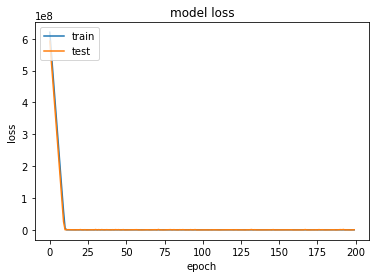

In [5]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 4. Визуализируйте точки набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), а также линию регрессии (другим цветом), подписывая оси и рисунок.  

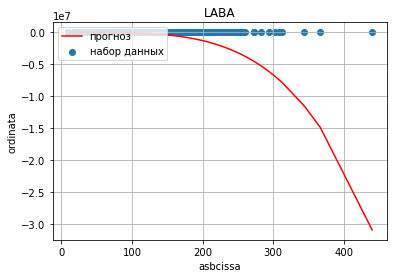

In [6]:
plt.title('LABA')
plt.xlabel('asbcissa')
plt.ylabel('ordinata')
plt.scatter(_x, data['features/chlorides'], label='набор данных')
plt.plot(np.sort(_x), reg2_model.predict(X2)[np.argsort(_x)], color='red', label='прогноз')
plt.legend(loc='upper left')
plt.grid();

# 5. Определите в исходном наборе данных признак (отличный от независимого и зависимого признаков), принимающий непрерывные значения и имеющий свойства, указанные в индивидуальном задании. 

In [7]:
data1.std()

features/alcohol                  1.230623
features/chlorides                0.021848
features/citric acid              0.121020
features/density                  0.002991
features/fixed acidity            0.843867
features/free sulfur dioxide     17.007133
features/pH                       0.151001
features/residual sugar           5.072068
features/sulphates                0.114126
features/total sulfur dioxide    42.498055
features/volatile acidity         0.100794
quality                           0.885639
dtype: float64

# 6. Визуализируйте этот признак в соответствии с индивидуальным заданием. 

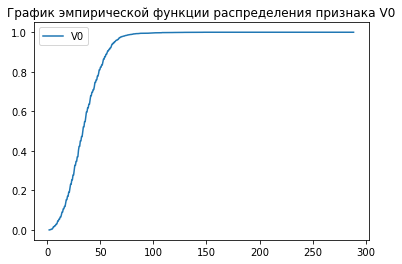

In [8]:
def ECDF(data, x):
    counter = 0
    for v in data:
        if v <= x:
            counter += 1
    return counter / len(data)
samples = data1['features/free sulfur dioxide'] # sepal length
npoints = 500
dx = (samples.max()-samples.min())/npoints

xlist = [samples.min()+dx*i for i in range(npoints)]
ylist = [ECDF(samples, x) for x in xlist]

df_ECDF = pd.DataFrame(ylist, columns=['V0'],index=xlist)
df_ECDF
df_ECDF.plot.line(title='График эмпирической функции распределения признака V0');

# 7. Сформируйте набор входных из двух признаков набора данных (независимый признак и определенный признак), создайте и адаптируйте нормализующий слой Tensorflow для двух признаков. 

In [9]:
data2=data1[['features/total sulfur dioxide', 'features/free sulfur dioxide']]
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(2,)) 
feature_normalizer.adapt(data2)

# 8. Используя созданный нормализующий слой, постройте нейронную сеть (нелинейный регресор) с количеством скрытых слоев, количеством нейронов и функцией активации, указанными в индивидуальном задании, и одним нейроном в выходном слое и обучите ее на наборе данных из двух признаков и отклика. 

In [10]:
large_model = tf.keras.Sequential([feature_normalizer,
                                   tf.keras.layers.Dense(units=64, activation='tanh'),
                                   tf.keras.layers.Dense(units=64, activation='tanh'),
                                   tf.keras.layers.Dense(units=64, activation='tanh'),
                                   tf.keras.layers.Dense(units=64, activation='tanh'),
                                   tf.keras.layers.Dense(units=1)])
large_model.summary()
large_model.compile(loss='mae')
history = large_model.fit(data2, data1['features/chlorides'], epochs=200,verbose=1,validation_split = 0.3)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 2)                3         
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 64)                192       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                      

Epoch 69/200
108/108 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.0107
Epoch 70/200
108/108 [==============================] - 1s 5ms/step - loss: 0.0105 - val_loss: 0.0109
Epoch 71/200
108/108 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.0103
Epoch 72/200
108/108 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.0104
Epoch 73/200
108/108 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.0104
Epoch 74/200
108/108 [==============================] - 0s 4ms/step - loss: 0.0105 - val_loss: 0.0106
Epoch 75/200
108/108 [==============================] - 0s 4ms/step - loss: 0.0105 - val_loss: 0.0118
Epoch 76/200
108/108 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.0104
Epoch 77/200
108/108 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.0112
Epoch 78/200
108/108 [==============================] - 0s 3ms/step - loss: 0.0105

Epoch 149/200
108/108 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.0107
Epoch 150/200
108/108 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.0110
Epoch 151/200
108/108 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.0107
Epoch 152/200
108/108 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.0103
Epoch 153/200
108/108 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.0103
Epoch 154/200
108/108 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.0105
Epoch 155/200
108/108 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.0104
Epoch 156/200
108/108 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.0106
Epoch 157/200
108/108 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.0106
Epoch 158/200
108/108 [==============================] - 0s 3ms/step - lo

# 9. Визуализируйте набор данных в виде точечного графика и прогноз нейронной сети в виде поверхности в трехмерном пространстве.

In [11]:
xs = data2.values[:,0]
ys = data2.values[:,1]
zs = data1['features/chlorides']
n_plot = 5

In [12]:
x_plot = np.linspace(np.min(xs), np.max(xs), n_plot) 
y_plot = np.linspace(np.min(ys), np.max(ys), n_plot)
x_mesh, y_mesh = np.meshgrid(x_plot, y_plot)

In [13]:
x_plot2 = np.reshape(x_mesh, [n_plot**2,1])
y_plot2 = np.reshape(y_mesh, [n_plot**2,1])
xy_2 = np.hstack([x_plot2, y_plot2])

In [14]:
z = large_model.predict(xy_2)
z_mesh = z.reshape((n_plot, n_plot))

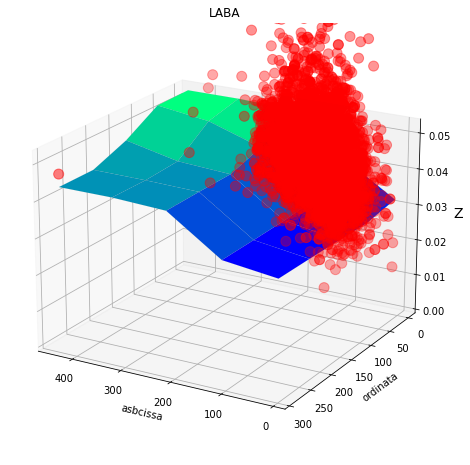

In [19]:
from matplotlib import cm
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, \
       rstride=1, cstride=1, linewidth=0.05, cmap=cm.winter, antialiased=True, \
       edgecolors='gray') 
ax.scatter( xs, ys, zs, s=100, c='r' )
plt.title('LABA')
plt.xlabel('asbcissa')
plt.ylabel('ordinata')
ax.set_zlabel('Z', fontsize=14) 
ax.set_zlim(0., z_mesh.max())
ax.view_init(elev = 20, azim = 120)

# 10. Разбейте набор данных из двух признаков и отклика на обучающую и тестовую выборки и постройте кривые обучения для заданного показателя качества в зависимости от количества точек в обучающей выборке, подписывая оси и рисунок и создавая легенду. 

In [16]:
def train_test_split(X, y, test_ratio=0.2, seed=None):
    """возвращает X_train, X_test, y_train, y_test"""
    assert X.shape[0] == y.shape[0], \
        "Размер X должен быть равен размеру y"
    assert 0.0 <= test_ratio <= 1.0, \
        "Неверное значение test_ratio"

    if seed:
        np.random.seed(seed)

    shuffled_indexes = np.random.permutation(len(X))

    test_size = int(len(X) * test_ratio)
    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]

    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(data2.values, data1['features/chlorides'])
X_train.shape

(3919, 2)

In [17]:
train_score = []
test_score = []
for i in range(1, 3919, int(3919/30)):
    large_model = tf.keras.Sequential([
        feature_normalizer,
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=1)
    ])
    large_model.compile(loss='mse')
    large_model.fit(X_train[:i], y_train[:i], epochs=10, verbose=0)

    y_train_predict = large_model.predict(X_train[:i])
    train_score.append(mean_absolute_error(y_train[:i], y_train_predict))
    
    y_test_predict = large_model.predict(X_test)
    test_score.append(mean_absolute_error(y_test, y_test_predict))
    print('-->', i, ' done')

--> 1  done
--> 131  done
--> 261  done
--> 391  done
--> 521  done
--> 651  done
--> 781  done
--> 911  done
--> 1041  done
--> 1171  done
--> 1301  done
--> 1431  done
--> 1561  done
--> 1691  done
--> 1821  done
--> 1951  done
--> 2081  done
--> 2211  done
--> 2341  done
--> 2471  done
--> 2601  done
--> 2731  done
--> 2861  done
--> 2991  done
--> 3121  done
--> 3251  done
--> 3381  done
--> 3511  done
--> 3641  done
--> 3771  done
--> 3901  done


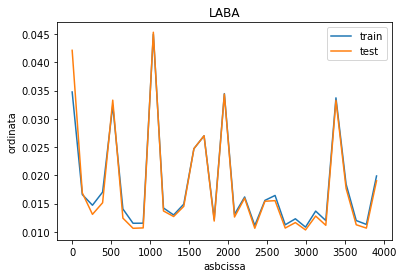

In [18]:
plt.title('LABA')
plt.xlabel('asbcissa')
plt.ylabel('ordinata')
plt.plot([i for i in range(1, len(X_train), int(3919/30))], train_score, label="train")
plt.plot([i for i in range(1, len(X_train), int(3919/30))], test_score, label="test")
plt.legend();